In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, string
from wordcloud import WordCloud
from collections import Counter
from sklearn.preprocessing import LabelEncoder

In [17]:
# https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data

In [14]:
# %pip install nltk

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sauravsuman01\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [3]:
# -------------------------------
# 1. Load and clean the data
# -------------------------------
df = pd.read_csv("cb_tweets.csv")

In [4]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)       # remove URLs
    text = re.sub(r"@\w+", "", text)                 # remove mentions
    text = re.sub(r"#\w+", "", text)                 # remove hashtags
    text = re.sub(r"[{}]".format(string.punctuation), "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_text"] = df["tweet_text"].apply(clean_text)
df["word_count"] = df["clean_text"].apply(lambda x: len(x.split()))
df["char_count"] = df["clean_text"].apply(len)

C:\Users\sauravsuman01\AppData\Local\Temp\ipykernel_9252\904050566.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="cyberbullying_type", data=df, order=df["cyberbullying_type"].value_counts().index, palette="viridis")


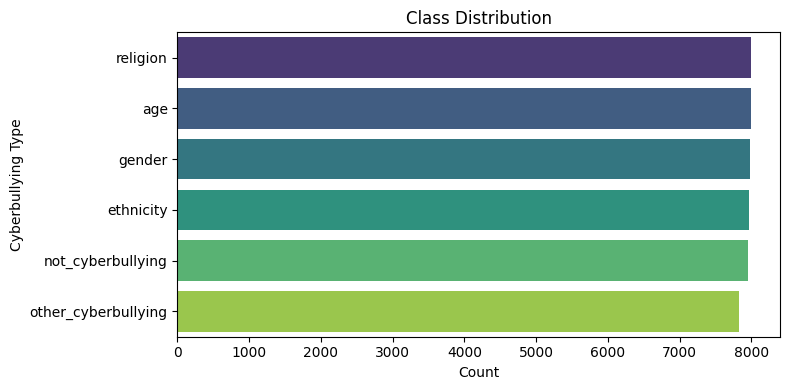

In [5]:
# -------------------------------
# 2. Encode labels
# -------------------------------
le = LabelEncoder()
df["label_id"] = le.fit_transform(df["cyberbullying_type"])

# -------------------------------
# 3. Distribution of Classes
# -------------------------------
plt.figure(figsize=(8,4))
sns.countplot(y="cyberbullying_type", data=df, order=df["cyberbullying_type"].value_counts().index, palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Count")
plt.ylabel("Cyberbullying Type")
plt.tight_layout()
plt.show()

C:\Users\sauravsuman01\AppData\Local\Temp\ipykernel_9252\3372652349.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cyberbullying_type", y="word_count", data=df, palette="coolwarm")


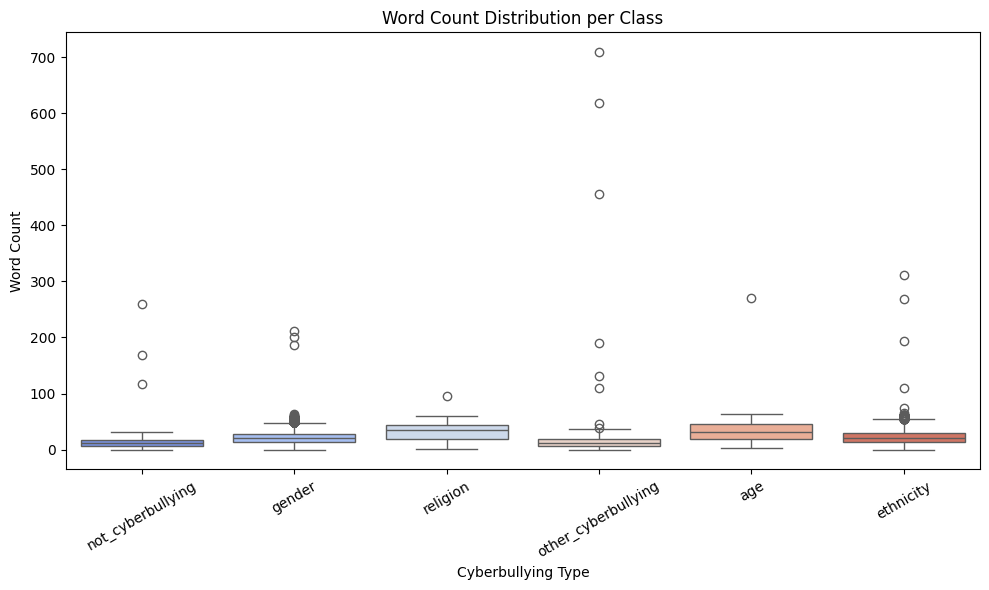

In [6]:
# -------------------------------
# 4. Word Count Distribution per Class
# -------------------------------
plt.figure(figsize=(10,6))
sns.boxplot(x="cyberbullying_type", y="word_count", data=df, palette="coolwarm")
plt.title("Word Count Distribution per Class")
plt.xlabel("Cyberbullying Type")
plt.ylabel("Word Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

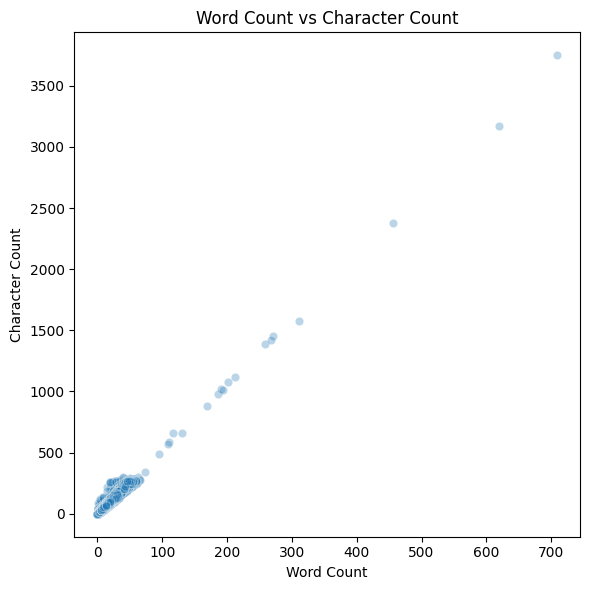

In [7]:
# -------------------------------
# 5. Correlation between word_count and char_count
# -------------------------------
plt.figure(figsize=(6,6))
sns.scatterplot(x="word_count", y="char_count", data=df, alpha=0.3)
plt.title("Word Count vs Character Count")
plt.xlabel("Word Count")
plt.ylabel("Character Count")
plt.tight_layout()
plt.show()

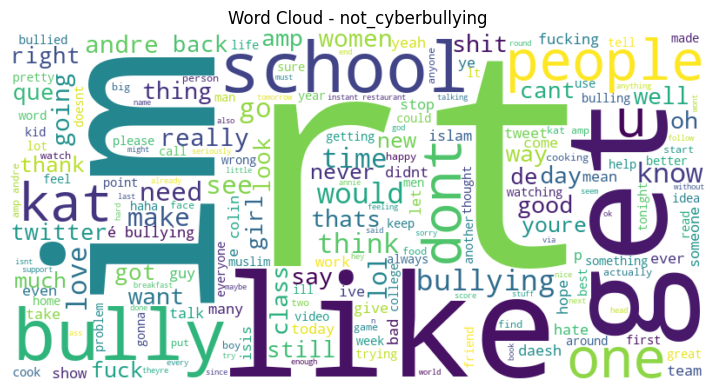

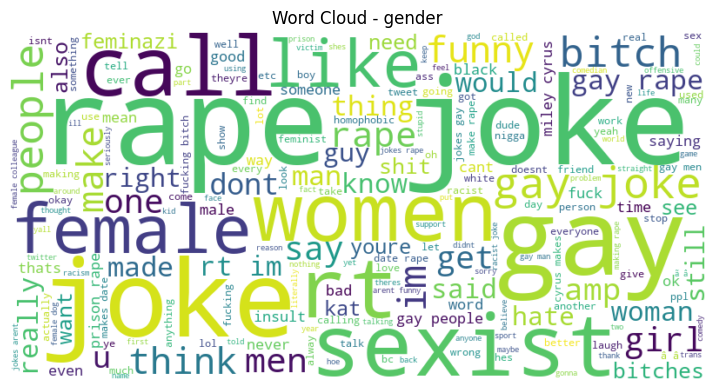

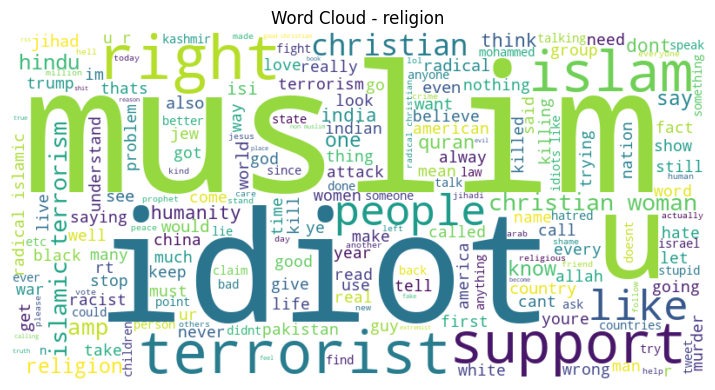

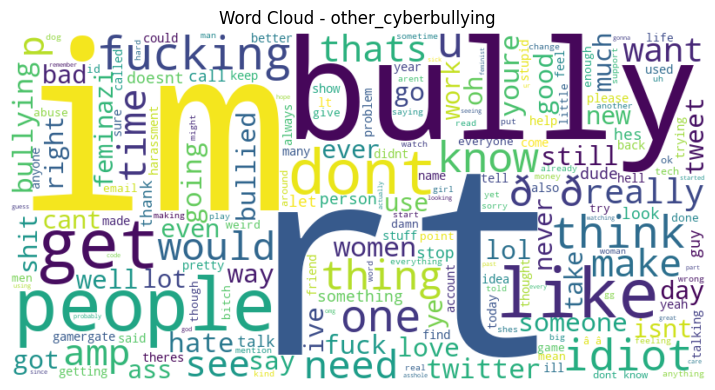

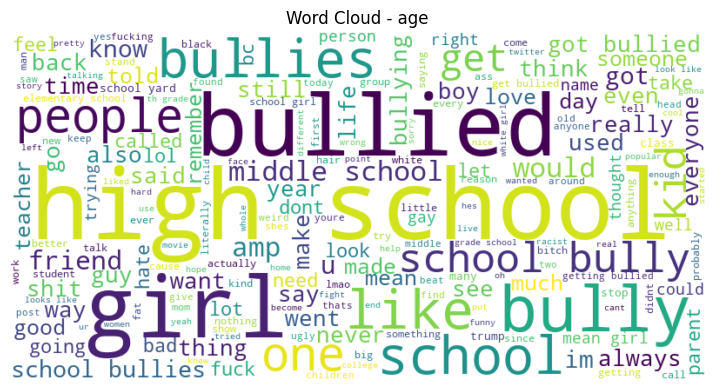

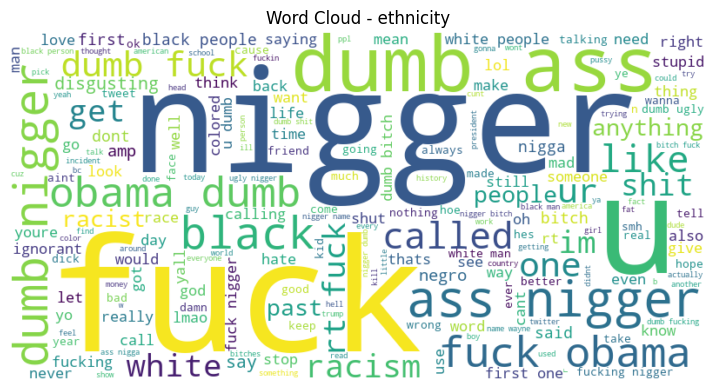

In [15]:
# -------------------------------
# 6. WordCloud per Class
# -------------------------------
for label in df["cyberbullying_type"].unique():
    text = " ".join(df[df["cyberbullying_type"] == label]["clean_text"])
    wc = WordCloud(width=800, height=400, background_color="white", stopwords=stop_words).generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {label}")
    plt.tight_layout()
    plt.show()

C:\Users\sauravsuman01\AppData\Local\Temp\ipykernel_9252\4143115649.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Word", data=common_df, palette="magma")


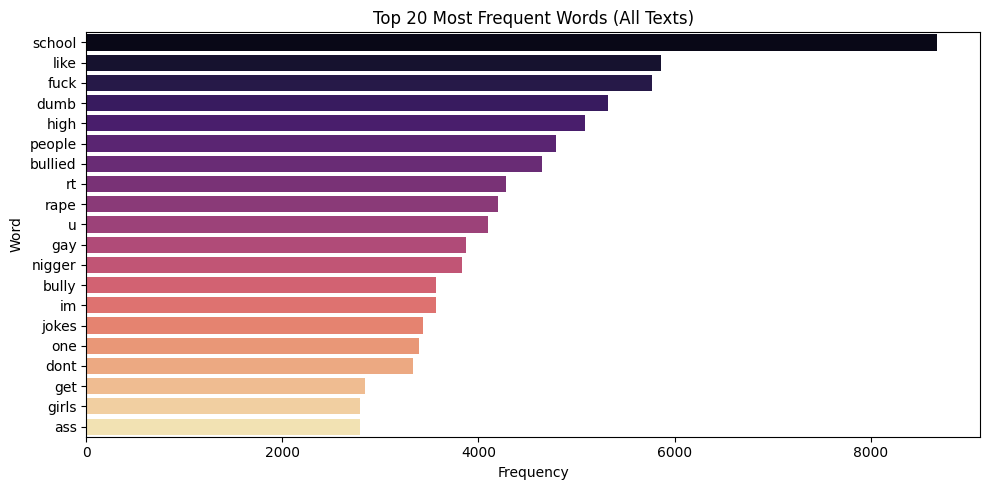

In [16]:
# -------------------------------
# 7. Most Common Words Overall
# -------------------------------
all_words = " ".join(df["clean_text"]).split()
filtered_words = [w for w in all_words if w not in stop_words]
common_words = Counter(filtered_words).most_common(20)

common_df = pd.DataFrame(common_words, columns=["Word", "Frequency"])
plt.figure(figsize=(10,5))
sns.barplot(x="Frequency", y="Word", data=common_df, palette="magma")
plt.title("Top 20 Most Frequent Words (All Texts)")
plt.tight_layout()
plt.show()

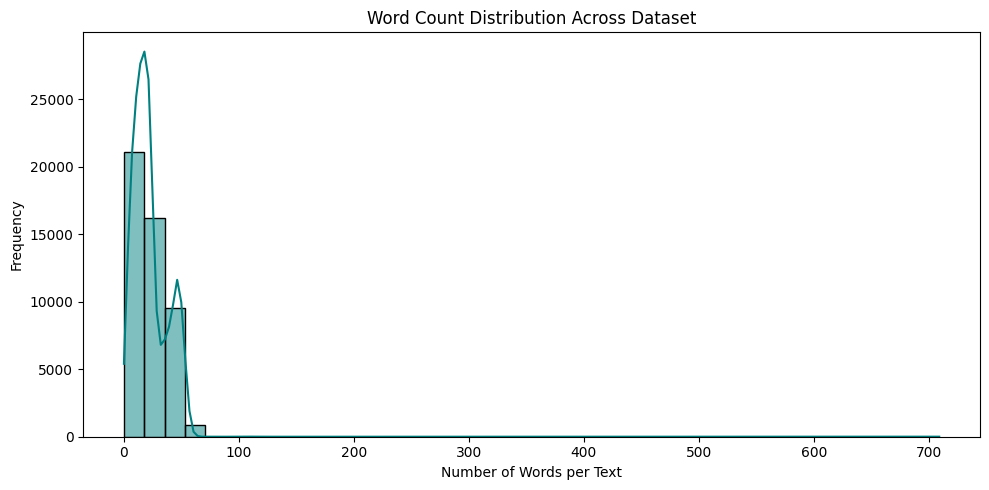

In [10]:
# -------------------------------
# 8. Text Length Distribution (Histogram + KDE)
# -------------------------------
plt.figure(figsize=(10,5))
sns.histplot(df["word_count"], bins=40, kde=True, color='teal')
plt.title("Word Count Distribution Across Dataset")
plt.xlabel("Number of Words per Text")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

C:\Users\sauravsuman01\AppData\Local\Temp\ipykernel_9252\2382758874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_wc.values, y=avg_wc.index, palette="crest")


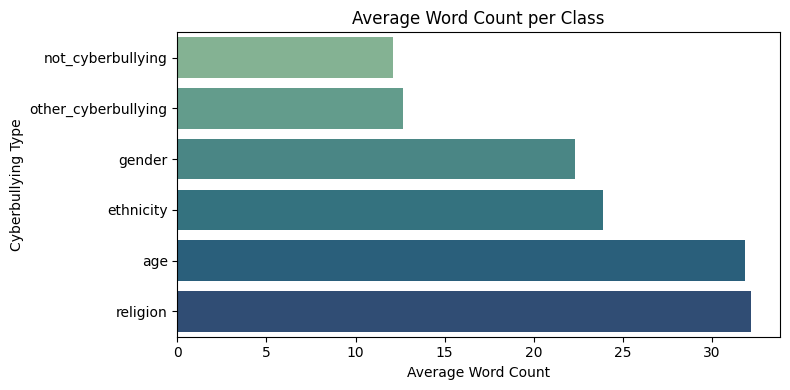

In [11]:
# -------------------------------
# 9. Average Word Count per Class
# -------------------------------
avg_wc = df.groupby("cyberbullying_type")["word_count"].mean().sort_values()
plt.figure(figsize=(8,4))
sns.barplot(x=avg_wc.values, y=avg_wc.index, palette="crest")
plt.title("Average Word Count per Class")
plt.xlabel("Average Word Count")
plt.ylabel("Cyberbullying Type")
plt.tight_layout()
plt.show()

In [12]:
# -------------------------------
# 10. Summary Table
# -------------------------------
summary = df.groupby("cyberbullying_type").agg({
    "word_count": ["mean", "std", "min", "max"],
    "char_count": ["mean", "std"]
}).round(2)

print("\n📋 Text Statistics Summary per Class:\n")
print(summary)



📋 Text Statistics Summary per Class:

                    word_count                 char_count       
                          mean    std min  max       mean    std
cyberbullying_type                                              
age                      31.89  14.77   2  271     165.64  76.16
ethnicity                23.88  14.32   0  311     123.20  76.15
gender                   22.33  13.39   0  212     116.65  71.28
not_cyberbullying        12.09   7.55   0  259      63.13  40.07
other_cyberbullying      12.66  14.00   0  709      65.22  73.10
religion                 32.22  13.64   1   95     179.90  74.91
